<h1 align=center ><b>Exploring Weather Trends</b></h1>

<b>Data Extraction:</b></br>
To extract data I used SQL quires in the environment provided in Udacity. There are 2 different tables named city_data, city_list, global_data. From these tables I need global_data and city_data for the comparison of global temperature with the local temperature.
</br></br>
Quires used:
</br>  Select * from city_data;
</br>  Select * from global_data;
</br></br>
The results from each query gives you all the data that is present in the database. I downloaded the whole datasets in .csv format. 

<b>Data Preprocessing:</b>
   Once I downloaded the data, I created a python project in PyCharm where I am using a jupyter notebook to code. Firs step is to load required packages for the analysis.
The required libraries are Pandas, numpy and pyplot from matplotlib.

In [110]:
#Importing required Packages for analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import  warnings
warnings.filterwarnings('ignore')#Ignore all warnings

In the following code I have used pandas method to read the .csv files that are downloaded from the database.
and check the data loaded by using head().

In [111]:
city = pd.read_csv("Data/city_data.csv")
glob = pd.read_csv("Data/global_data.csv")
print(city.head(5))
print("\n" + "-"*50 + "\n")
print(glob.head(5))

   year     city        country  avg_temp
0  1849  Abidjan  Côte D'Ivoire     25.58
1  1850  Abidjan  Côte D'Ivoire     25.52
2  1851  Abidjan  Côte D'Ivoire     25.67
3  1852  Abidjan  Côte D'Ivoire       NaN
4  1853  Abidjan  Côte D'Ivoire       NaN

--------------------------------------------------

   year  avg_temp
0  1750      8.72
1  1751      7.98
2  1752      5.78
3  1753      8.39
4  1754      8.47


As I am in Dallas, I would like to compare the Global temperature with Dallas temperature. So I have to Separate the Dallas data from all the other cities.
After getting the dallas data I have observed there is some missing data from the initial years, do I have to remove those years from Global data for Comparsion. For this I am using "iloc".

In [112]:
#get data for Dallas, TX
dallas = city[city["city"]== "Dallas"]
glob_filter = glob[glob['year']>= dallas['year'].iloc[0]]
dallas.head(5)

,year,city,country,avg_temp
17686,1820,Dallas,United States,16.88
17687,1821,Dallas,United States,17.33
17688,1822,Dallas,United States,17.87
17689,1823,Dallas,United States,17.46
17690,1824,Dallas,United States,17.90


<b> Moving Average</b></br>
To remove volatile graph from the plot we use the Moving avg for the comparision. For this analysis I am using a 5 year moving avg and replacing the NaN values from the moving avg with the avg_temp.

In [113]:
# Moving avg for global and Dallas data
for i in range(dallas.shape[0]-5):
    total = 0  # To calculate a sum to get the avg.
    for j in range(5): #find sum of 5 years of avg_temp value to get te moving avg.
        total+= float(dallas.iloc[i+j,3])
    dallas.loc[dallas.index[i+4],'Mov_Avg_5'] = np.round(total/5,2)
dallas.Mov_Avg_5.fillna(dallas.avg_temp, inplace = True)
dallas.head(20)

,year,city,country,avg_temp,Mov_Avg_5
17686,1820,Dallas,United States,16.88,16.88
17687,1821,Dallas,United States,17.33,17.33
17688,1822,Dallas,United States,17.87,17.87
17689,1823,Dallas,United States,17.46,17.46
17690,1824,Dallas,United States,17.90,17.49
17691,1825,Dallas,United States,18.38,17.79
17692,1826,Dallas,United States,17.93,17.91
17693,1827,Dallas,United States,18.62,18.06
17694,1828,Dallas,United States,18.26,18.22
17695,1829,Dallas,United States,17.89,18.22


In [114]:
for i in range(glob_filter.shape[0]-5):
    total = 0  # To calculate a sum to get the avg.
    for j in range(5): #find sum of 5 years of avg_temp value to get te moving avg.
        total+= float(glob_filter.iloc[i+j,1])
    glob_filter.loc[glob_filter.index[i+4],'Mov_Avg_5'] = np.round(total/5,2)
glob_filter.Mov_Avg_5.fillna(glob_filter.avg_temp, inplace = True)    
glob_filter.head(20)

,year,avg_temp,Mov_Avg_5
70,1820,7.62,7.62
71,1821,8.09,8.09
72,1822,8.19,8.19
73,1823,7.72,7.72
74,1824,8.55,8.03
75,1825,8.39,8.19
76,1826,8.36,8.24
77,1827,8.81,8.37
78,1828,8.17,8.46
79,1829,7.94,8.33


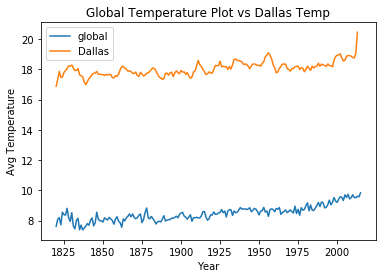

In [115]:
plt.plot(glob_filter['year'], glob_filter['avg_temp'], label = "global")

plt.plot(dallas['year'], dallas['Mov_Avg_5'], label = 'Dallas')

plt.xlabel("Year")
plt.ylabel("Avg Temperature")
plt.title('Global Temperature Plot vs Dallas Temp')
plt.legend()
plt.show()

In [116]:
dallas['Mov_Avg_5'].describe()


count    194.000000
mean      18.045412
std        0.457856
min       16.880000
25%       17.725000
50%       18.030000
75%       18.267500
max       20.450000
Name: Mov_Avg_5, dtype: float64

In [117]:
glob_filter['Mov_Avg_5'].describe()

count    196.000000
mean       8.462296
std        0.467863
min        7.520000
25%        8.097500
50%        8.380000
75%        8.680000
max        9.830000
Name: Mov_Avg_5, dtype: float64

In [118]:
print(dallas.head(1))
print(dallas.tail(1))
print("\n" + "-"*50 + "\n")
print(glob_filter.head(1))
print(glob_filter.tail(1))

       year    city        country  avg_temp  Mov_Avg_5
17686  1820  Dallas  United States     16.88      16.88
       year    city        country  avg_temp  Mov_Avg_5
17879  2013  Dallas  United States     20.45      20.45

--------------------------------------------------

    year  avg_temp  Mov_Avg_5
70  1820      7.62       7.62
     year  avg_temp  Mov_Avg_5
265  2015      9.83       9.83


<b>Observations:</b>

<ol>
    <li> Dallas temperatures are Almost 10 degrees above the global temperatures with the Average temperature of 18 degrees and the Global average is 8.46 degrees. </li>
    <li> There is 4 degree increase in Dallas temperature where as Global temperature has seen only 2 degrees increase</li>
    <li> The Temperature variation in global temerature is almost similar with Dallas temperature except between 1950-55 where we have seen a significant decrease in dallas temperature but the global temperature hasn't seen that decrease.</li>  
    <li> Overall There is a increasing trend in the global temperature and Dallas City temperature. Global temperature varies with the change in Dallas temperature but there are other cities which can have impact on the global avg temperature.</li>
</ol>

